In [2]:
import numpy as np 
import pandas as pd 

from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.cross_validation import  train_test_split
import time 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis
from sklearn.metrics import mean_squared_error
from math import sqrt

Using TensorFlow backend.
C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
prices_dataset =  pd.read_csv('prices.csv', header=0)
prices_dataset.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [4]:
dataset = prices_dataset[prices_dataset['symbol']=='GOOGL']
dataset = dataset.close.values.astype('float32')
dataset = dataset.reshape(1762, 1)

In [250]:
dataset

array([[ 626.75      ],
       [ 623.98999023],
       [ 608.26000977],
       ..., 
       [ 804.57000732],
       [ 802.88000488],
       [ 792.45001221]], dtype=float32)

In [251]:
n = dataset.shape[0]
p = dataset.shape[1]
# dataset = dataset.values


In [252]:
dataset

array([[ 626.75      ],
       [ 623.98999023],
       [ 608.26000977],
       ..., 
       [ 804.57000732],
       [ 802.88000488],
       [ 792.45001221]], dtype=float32)

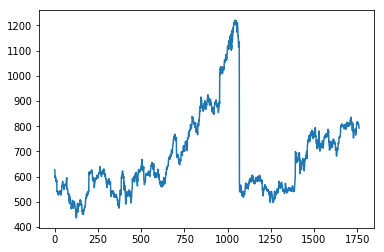

In [253]:
plt.plot(dataset)
plt.show()

In [254]:
train_start = 0
train_end = int(np.floor(0.8*n))
test_start = train_end
test_end = n
data_train = dataset[np.arange(train_start, train_end), :]
data_test = dataset[np.arange(test_start, test_end), :]

In [255]:
data_train.shape

(1409, 1)

In [256]:
data_test.shape

(353, 1)

In [257]:
# Scale data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)
# Build X and y
X_train = data_train[:]
y_train = data_train[:, 0]
X_test = data_test[:]
y_test = data_test[:, 0]

In [258]:
X_train.shape
#y_test.shape

(1409, 1)

In [259]:
y_train.shape

(1409,)

In [260]:
X_test.shape

(353, 1)

In [261]:
y_test.shape

(353,)

In [262]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [263]:
X_train.shape
#layers=['1409','1','4']

(1409, 1, 1)

In [264]:
from keras import optimizers

In [265]:
model = Sequential()
model.add(LSTM(128, input_shape=(1, 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, input_shape=(1, 1), return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(16,activation='relu'))        
model.add(Dense(1,activation='linear'))
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])

In [266]:
model.fit(
    X_train,
    y_train,
    batch_size=64,
    nb_epoch=100,
    validation_split=0.1)

C:\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 1268 samples, validate on 141 samples
Epoch 1/100
1268/1268 [==============================] - 3s 2ms/step - loss: 0.1047 - acc: 7.8864e-04 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 2/100
1268/1268 [==============================] - 0s 153us/step - loss: 0.0380 - acc: 7.8864e-04 - val_loss: 0.0307 - val_acc: 0.0000e+00
Epoch 3/100
1268/1268 [==============================] - 0s 154us/step - loss: 0.0224 - acc: 0.0016 - val_loss: 0.0067 - val_acc: 0.0000e+00
Epoch 4/100
1268/1268 [==============================] - 0s 152us/step - loss: 0.0093 - acc: 0.0016 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 5/100
1268/1268 [==============================] - 0s 148us/step - loss: 0.0015 - acc: 0.0016 - val_loss: 2.5972e-05 - val_acc: 0.0000e+00
Epoch 6/100
1268/1268 [==============================] - 0s 157us/step - loss: 9.6034e-04 - acc: 0.0016 - val_loss: 3.0905e-05 - val_acc: 0.0000e+00
Epoch 7/100
1268/1268 [==============================] - 0s 150us/step - loss: 9.8848e-04

Epoch 55/100
1268/1268 [==============================] - 0s 145us/step - loss: 4.0804e-04 - acc: 0.0016 - val_loss: 1.3631e-05 - val_acc: 0.0000e+00
Epoch 56/100
1268/1268 [==============================] - 0s 147us/step - loss: 5.1193e-04 - acc: 0.0016 - val_loss: 8.3292e-06 - val_acc: 0.0000e+00
Epoch 57/100
1268/1268 [==============================] - 0s 142us/step - loss: 3.8846e-04 - acc: 0.0016 - val_loss: 1.3233e-07 - val_acc: 0.0000e+00
Epoch 58/100
1268/1268 [==============================] - 0s 147us/step - loss: 4.1548e-04 - acc: 0.0016 - val_loss: 1.0588e-06 - val_acc: 0.0000e+00
Epoch 59/100
1268/1268 [==============================] - 0s 146us/step - loss: 4.1683e-04 - acc: 0.0016 - val_loss: 1.3331e-05 - val_acc: 0.0000e+00
Epoch 60/100
1268/1268 [==============================] - 0s 146us/step - loss: 4.4862e-04 - acc: 0.0016 - val_loss: 3.2477e-06 - val_acc: 0.0000e+00
Epoch 61/100
1268/1268 [==============================] - 0s 145us/step - loss: 4.2209e-04 - acc: 0.

In [267]:

scores = model.evaluate(X_test, y_test, verbose=1) 
print("MSE: ", (scores[0]))

353/353 [==============================] - 0s 92us/step
MSE:  6.25966022559e-06


In [268]:
p = model.predict(X_test)
p = scaler.inverse_transform(p)

In [269]:
# plt.plot(p)
# plt.show()

In [270]:
data_test = scaler.inverse_transform(data_test)
y_test = data_test[:,0]

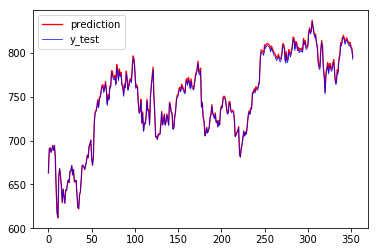

In [273]:
import matplotlib.pyplot as plt2

plt2.plot(p,color='red', label='prediction',linewidth='1.3')
plt2.plot(y_test,color='blue', label='y_test',linewidth='0.7')
plt2.legend(loc='upper left')
plt2.show()